In [1]:
from brian2 import *
import random
%matplotlib inline

# Test a group of cells on a simple current input

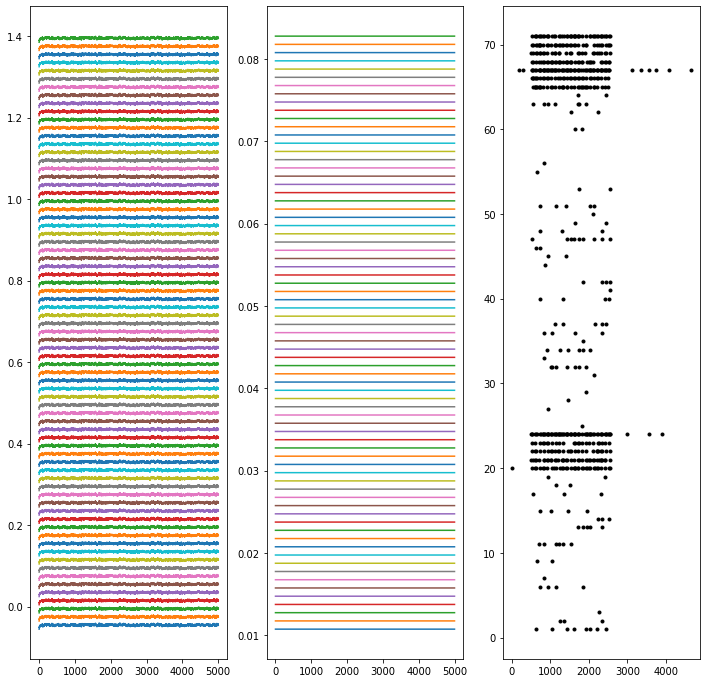

In [29]:
start_scope()
random.seed(10)
# how many different types of neurons?
N_E_thal = 20
N_I_thal = 5
N_E_ctx = 40
N_I_ctx = 8
N_tot = N_E_thal+N_I_thal+N_E_ctx+N_I_ctx

# stochastic noise level
sigma=2*mV

# define the neuron group
stimulus = TimedArray([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,200.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]*Hz,dt=50.*ms)
P = PoissonGroup(72, rates='stimulus(t)')

# P = PoissonGroup(72, np.arange(72)*Hz + 200*Hz)
G = NeuronGroup(N_tot, '''dv/dt = -(v-v_rest)/tau+sigma*xi*tau**-0.5 : volt
                       tau : second
                       v_rest : volt''', 
                threshold='v > -40*mV',
                reset='v = -70*mV+3*randn()*mV',
                refractory=2*ms,
                method='euler')
S = Synapses(P, G, on_pre='v+=5*mV')
S.connect(j='i')


# define subgroups
G_E_thal = G[:N_E_thal]
G_I_thal = G[N_E_thal:N_E_thal+N_I_thal]
G_E_ctx = G[N_E_thal+N_I_thal:N_E_thal+N_I_thal+N_E_ctx]
G_I_ctx = G[N_E_thal+N_I_thal+N_E_ctx:N_tot]

# set initial values
G_E_thal.v = '-70*mV+randn()*5*mV'
G_E_thal.v_rest = '-80*mV+randn()*5*mV'
G_E_thal.tau='20*ms+rand()*10*ms'
# G_E_thal.threshold='v> -50*mV'

G_I_thal.v = '-50*mV+randn()*5*mV'
G_I_thal.v_rest = '-50*mV+randn()*5*mV'
G_I_thal.tau='10*ms+rand()*3*ms'
# G_I_thal.threshold='v> -40*mV'

G_E_ctx.v = '-70*mV+randn()*5*mV'
G_E_ctx.v_rest = '-80*mV+randn()*5*mV'
G_E_ctx.tau='20*ms+rand()*10*ms'
# G_E_ctx.threshold='v> -50*mV'

G_I_ctx.v = '-50*mV+randn()*5*mV'
G_I_ctx.v_rest = '-50*mV+randn()*5*mV'
G_I_ctx.tau='10*ms+rand()*3*ms'
# G_I_ctx.threshold='v> -40*mV'

# setup the monitors
statemon = StateMonitor(G, ['tau','v'], record=True)
M = SpikeMonitor(G)

run(5000*ms)

# plot
figure(figsize=(12,12))
subplot(131)
for k in range(N_tot):
    plot(statemon.t/ms, 20*k*mV+statemon.v[i])
    
subplot(132)
for k in range(N_tot):
    plot(statemon.t/ms, k*ms+statemon.tau[i])
    
subplot(133)
plot(M.t/ms, M.i,'k.')

In [ ]:
print(statemon.v.size)